In [1]:
pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.4 MB/s 
     |████████████████████████████████| 8.2 MB 29.2 MB/s 


In [2]:
import pandas as pd
import re
import seaborn as sns # lib for plots+pandas
import pymorphy2 # классная либа для работы со словами

In [3]:
def format(string):
  string =  re.sub(r'[0-9]|[a-zA-z]|[^\w\s]', '', string).lower() # removes all punctuation, latin symbols, digits and lower string
  morpher = pymorphy2.MorphAnalyzer() # using for getting normal form of word
  los = string.split()
  los = list(map(lambda x:morpher.parse(x)[0].normal_form, los)) #list of normal forms of words in string
  return los


In [4]:
def updateWFD(los, wfd): # los - list of strings, wfd - word frequncy dict
  for word in los:
    wfd[word] = wfd.get(word, 0) + 1

In [5]:
with open('female.txt') as data:
  wfd = {} 
  updateWFD(format(data.read()), wfd)
  wfd = pd.DataFrame.from_dict(wfd, orient='index')
  wfd.columns = ['кол-во']
  

In [6]:
with open('stopwords.txt') as kicklist_file: #using banlist from 4-th task
  kicklist = set(kicklist_file.read().split())
  wfd = wfd.drop(filter(lambda x: x in kicklist, wfd.index.values))

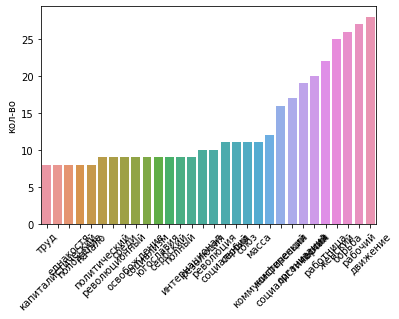

In [7]:
wfd = wfd.sort_values(by=['кол-во'])
plot = sns.barplot(x = wfd[-30:].index.values, y=wfd['кол-во'][-30:])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plot

Текст про движение рабочих женщин, труд и преимущество коммунизма/социализма над капитализмом